# 4. Maze Q-learning

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (10/04/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)

In [1]:
from enum import Enum, auto
import matplotlib.pyplot as plt
import numpy as np
from models.qtable import QTableModel
from environment.maze import *

### Create maze

In [12]:
# Define maze
# 0 = free, 1 = wall
maze = np.array([[0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 1, 0, 1, 0, 0],
                 [0, 0, 0, 1, 1, 0, 1, 0],
                 [0, 1, 0, 1, 0, 0, 0, 0],
                 [1, 0, 0, 1, 0, 1, 0, 0],
                 [0, 0, 0, 1, 0, 1, 1, 1],
                 [0, 1, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0]])

game = Maze(maze)

### Show maze and moves

D:\Dropbox\Teaching\Deep Learning\1. Lectures\2. Matthieu De Mari\W13S1-2 - Introduction to RL\1. W12S3 final\2. Maze\environment\maze.py:156: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title("Best move")
D:\Dropbox\Teaching\Deep Learning\1. Lectures\2. Matthieu De Mari\W13S1-2 - Introduction to RL\1. W12S3 final\2. Maze\environment\maze.py:162: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title("Maze")


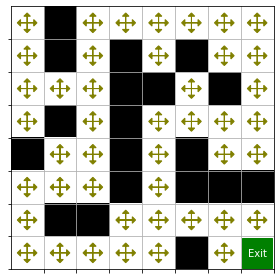

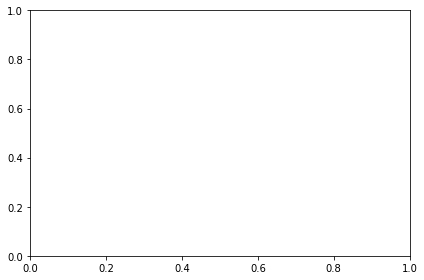

Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70
Episode: 71
Episode: 72
Episode: 73
Episode: 74
Episode: 75
Episode: 76
Episode: 77
Episode: 78
Episode: 79
Episode: 80
Episode: 81
Episode: 82
Episode: 83
Episode: 84
E

<ipython-input-3-215df7c8c838>:14: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(model.name)


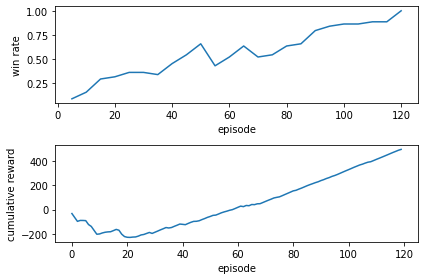

In [3]:
# Play the game.
# Warning: this takes a long time to run!
game.render(Render.TRAINING)
model = QTableModel(game, name = "QTableModel")
h, w, _, _ = model.train(discount = 0.90, exploration_rate = 0.10, learning_rate = 0.10, \
                         episodes = 200, stop_at_convergence = True)

# Display
try:
    # Forces error if history h does not exist.
    print(h)
    # Show win rates and cumulated rewards.
    fig, (ax1, ax2) = plt.subplots(2, 1, tight_layout=True)
    fig.canvas.set_window_title(model.name)
    ax1.plot(*zip(*w))
    ax1.set_xlabel("episode")
    ax1.set_ylabel("win rate")
    ax2.plot(h)
    ax2.set_xlabel("episode")
    ax2.set_ylabel("cumulative reward")
    plt.show()
except NameError:
    pass

# Render the moves by starting at cell (4,1).
# Exit is always at the bottom right. 
game.render(Render.MOVES)
game.play(model, start_cell=(4, 1))
# plt.show() must be placed here else the image disappears
# immediately at the end of the program.
plt.show()  

### Train

In [17]:
game.render(Render.TRAINING)

### Test

In [18]:
# Best move to use on cell (0,3) is go right (2)
# (0 = up, 1 = down, 2 = right, 3 = left)
print(model.predict((0,3)))
# Best move to use on cell (2,7) is go down (1)
# (0 = up, 1 = down, 2 = right, 3 = left)
print(model.predict((2,7)))
# Try some other cells to confirm!

2
1
